In [103]:
from imblearn.ensemble import BalancedRandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt


In [104]:
position_player_df = pd.read_csv('Data/position_players_complete.csv')
position_player_df.head()

,playerID,nameFirst,nameLast,Seasons,Hits,RBIs,Runs,Stolen_Bases,Strike_Outs,Home_Runs,...,bats,throws,finalGame,yearid,inducted,Total_Games,Games_Started,primary_position,years_since_final_game,eligible_for_hall
0,aaronha01,Hank,Aaron,23,3771,2297.0,2174,240.0,1383.0,755,...,R,R,1976-10-03,1982.0,Y,3298,3173.0,Out_Field,43.126027,eligible
1,aaronto01,Tommie,Aaron,7,216,94.0,102,9.0,145.0,13,...,R,R,1971-09-26,0.0,N,437,206.0,First_Base,48.150685,not_eligible
2,abadan01,Andy,Abad,3,2,0.0,1,0.0,5.0,0,...,L,L,2006-04-13,0.0,N,15,4.0,First_Base,13.580822,not_eligible
3,abadijo01,John,Abadie,2,11,5.0,4,1.0,3.0,0,...,R,R,1875-06-10,0.0,N,12,0.0,First_Base,144.509589,not_eligible
4,abbated01,Ed,Abbaticchio,10,772,324.0,355,142.0,283.0,11,...,R,R,1910-09-15,0.0,N,857,357.0,Second_Base,109.221918,eligible


In [105]:
position_player_df[position_player_df['eligible_for_hall']=='eligible'].inducted.value_counts()

N    2067
Y     157
Name: inducted, dtype: int64

In [106]:
position_player_df.columns

Index(['playerID', 'nameFirst', 'nameLast', 'Seasons', 'Hits', 'RBIs', 'Runs',
       'Stolen_Bases', 'Strike_Outs', 'Home_Runs', 'Walks', 'Games', 'Triples',
       'Doubles', 'Caught_Stealing', 'At_Bats', 'Intentional_Walks',
       'Hit_By_Pitch', 'Sacrifice_Hits', 'Sacrifice_Flies',
       'Ground_Into_Double_Plays', 'weight', 'height', 'bats', 'throws',
       'finalGame', 'yearid', 'inducted', 'Total_Games', 'Games_Started',
       'primary_position', 'years_since_final_game', 'eligible_for_hall'],
      dtype='object')

In [ ]:
Machine Learning Model - Balanced Random Forest Classifier

In [107]:
data = position_player_df.drop(['inducted', 'playerID', 'nameFirst', 'nameLast', 'finalGame','bats', 
                                'throws','weight', 'height','yearid','primary_position','years_since_final_game', 
                                'eligible_for_hall'], axis=1)
data.fillna(0, inplace=True)
data.shape

(10248, 20)

In [108]:
target = position_player_df['inducted']
target = target.replace(to_replace='0', 
                 value ="N") 
target.value_counts()

N    10089
Y      159
Name: inducted, dtype: int64

In [109]:
feature_names = data.columns
feature_names

Index(['Seasons', 'Hits', 'RBIs', 'Runs', 'Stolen_Bases', 'Strike_Outs',
       'Home_Runs', 'Walks', 'Games', 'Triples', 'Doubles', 'Caught_Stealing',
       'At_Bats', 'Intentional_Walks', 'Hit_By_Pitch', 'Sacrifice_Hits',
       'Sacrifice_Flies', 'Ground_Into_Double_Plays', 'Total_Games',
       'Games_Started'],
      dtype='object')

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/Users/chris.marchetti/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/chris.marchetti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/chris.marchetti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [111]:
clf = BalancedRandomForestClassifier(random_state=0)
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.9309133489461359

In [112]:
clf.score(X_train_scaled, y_train)

0.9428831641946396

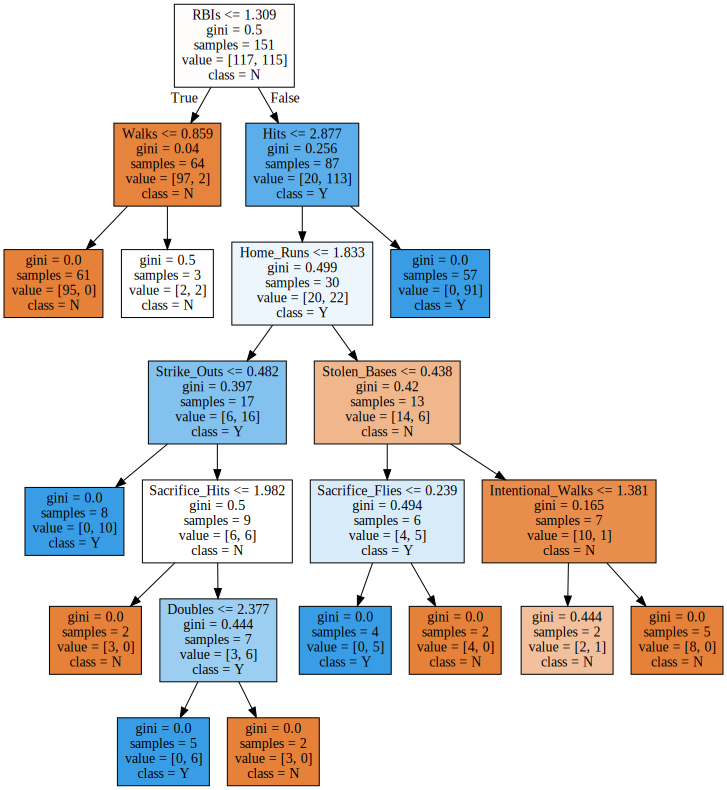

In [113]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf.estimators_[0], 
                                feature_names = feature_names, 
                                class_names=['N', 'Y'] , #y_train.columns,
                                filled = True
#,
#                                 proportion = True,
#                                 leaves_parallel=True
                               )
graph = graphviz.Source(dot_data)
graph

[[2343  176]
 [   1   42]]
Y    42
N     1
Name: predicted, dtype: int64
score for yesses, 0.9767441860465116
The score is the fraction of yesses, you predicted 0.9767441860465116
              precision    recall  f1-score   support

           N       1.00      0.93      0.96      2519
           Y       0.19      0.98      0.32        43

   micro avg       0.93      0.93      0.93      2562
   macro avg       0.60      0.95      0.64      2562
weighted avg       0.99      0.93      0.95      2562



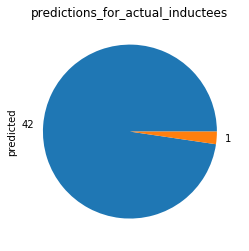

In [114]:
y_predicted = clf.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predicted))

predictions_df = pd.concat([pd.DataFrame(X_test_scaled),
#                            .copy().assign(
                           pd.DataFrame(dict(
    predicted= y_predicted,
    actual=y_test
)).reset_index(drop=True)
                           ], axis=1)
# pd.Series(y_test).value_counts()#[:20]
actual_inductees = predictions_df.loc[predictions_df.actual=='Y']
predictions_for_actual_inductees = actual_inductees.predicted.value_counts()
print(predictions_for_actual_inductees)
predictions_for_actual_inductees.plot(kind='pie', title='predictions_for_actual_inductees',  labels=predictions_for_actual_inductees.values)

print(f"score for yesses, {clf.score(actual_inductees.drop(['predicted', 'actual'],axis=1),actual_inductees .actual)}")
print('The score is the fraction of yesses, you predicted',  42/(1+42))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

In [115]:
print(clf.feature_importances_)

[0.02500883 0.15441204 0.14425392 0.1068096  0.00875195 0.0040366
 0.01020108 0.05873662 0.12035807 0.07643227 0.12155407 0.00160435
 0.06743917 0.00489091 0.00283759 0.00698434 0.00640377 0.0049019
 0.06909007 0.00529286]


In [116]:
feature_names

Index(['Seasons', 'Hits', 'RBIs', 'Runs', 'Stolen_Bases', 'Strike_Outs',
       'Home_Runs', 'Walks', 'Games', 'Triples', 'Doubles', 'Caught_Stealing',
       'At_Bats', 'Intentional_Walks', 'Hit_By_Pitch', 'Sacrifice_Hits',
       'Sacrifice_Flies', 'Ground_Into_Double_Plays', 'Total_Games',
       'Games_Started'],
      dtype='object')

Machine Learning Model - xgboost

In [117]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [118]:
# fit model no training data
model = XGBClassifier(scale_pos_weight=1)
model.fit(X_train_scaled, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


In [119]:
y_pred = model.predict(X_test_scaled)
len(y_pred)

2562

In [120]:
# pd.concat([pd.Series(y_pred), pd.Series(y_pred)], axis=1)

In [121]:
model.score(X_train_scaled, y_train)

0.9976580796252927

In [122]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.63%


In [123]:
model.score(X_test_scaled, y_test)

0.9863387978142076

[[2502   17]
 [  18   25]]
Y    25
N    18
Name: predicted, dtype: int64
The score is the fraction of yesses, you predicted 0.5813953488372093
              precision    recall  f1-score   support

           N       0.99      0.99      0.99      2519
           Y       0.60      0.58      0.59        43

   micro avg       0.99      0.99      0.99      2562
   macro avg       0.79      0.79      0.79      2562
weighted avg       0.99      0.99      0.99      2562



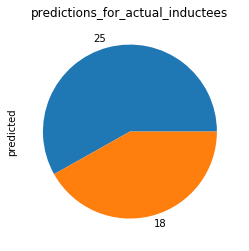

In [124]:

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
predictions_df = pd.concat([pd.DataFrame(X_test_scaled),
#                            .copy().assign(
                           pd.DataFrame(dict(
    predicted= y_pred,
    actual=y_test
)).reset_index(drop=True)
                           ], axis=1)
# pd.Series(y_test).value_counts()#[:20]
actual_inductees = predictions_df.loc[predictions_df.actual=='Y']
predictions_for_actual_inductees = actual_inductees.predicted.value_counts()
print(predictions_for_actual_inductees)
predictions_for_actual_inductees.plot(kind='pie', title='predictions_for_actual_inductees',  labels=predictions_for_actual_inductees.values)

# print(f"score for yesses, {model.score(actual_inductees.drop(['predicted', 'actual'],axis=1),actual_inductees .actual)}")
print('The score is the fraction of yesses, you predicted',  25/(18+25))
print(classification_report(y_test, y_pred))

In [125]:
print(model.feature_importances_)

[0.01996314 0.129307   0.1479063  0.24332312 0.03118645 0.03661241
 0.03500444 0.0242803  0.01923649 0.05763521 0.01845419 0.01828944
 0.04762429 0.         0.02476779 0.03252998 0.05060827 0.01925583
 0.01710613 0.02690919]


In [126]:
print(feature_names)

Index(['Seasons', 'Hits', 'RBIs', 'Runs', 'Stolen_Bases', 'Strike_Outs',
       'Home_Runs', 'Walks', 'Games', 'Triples', 'Doubles', 'Caught_Stealing',
       'At_Bats', 'Intentional_Walks', 'Hit_By_Pitch', 'Sacrifice_Hits',
       'Sacrifice_Flies', 'Ground_Into_Double_Plays', 'Total_Games',
       'Games_Started'],
      dtype='object')


In [127]:
data_total = position_player_df.drop(['inducted', 'playerID', 'nameFirst', 'nameLast', 'finalGame','bats', 
                                'throws','weight', 'height','yearid','primary_position','years_since_final_game', 
                                'eligible_for_hall'], axis=1)
data_total.fillna(0, inplace=True)
data_total_scaler = StandardScaler().fit(data_total)
data_total_scaled = data_total_scaler.transform(data_total)
data_total_predicted = model.predict(data_total_scaled)

/Users/chris.marchetti/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/chris.marchetti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [128]:
position_player_predicted = pd.concat([position_player_df, pd.Series(data_total_predicted)], axis=1)
position_player_predicted.rename(columns={0:"model_predict"}, inplace=True)
position_player_predicted.head()

,playerID,nameFirst,nameLast,Seasons,Hits,RBIs,Runs,Stolen_Bases,Strike_Outs,Home_Runs,...,throws,finalGame,yearid,inducted,Total_Games,Games_Started,primary_position,years_since_final_game,eligible_for_hall,model_predict
0,aaronha01,Hank,Aaron,23,3771,2297.0,2174,240.0,1383.0,755,...,R,1976-10-03,1982.0,Y,3298,3173.0,Out_Field,43.126027,eligible,Y
1,aaronto01,Tommie,Aaron,7,216,94.0,102,9.0,145.0,13,...,R,1971-09-26,0.0,N,437,206.0,First_Base,48.150685,not_eligible,N
2,abadan01,Andy,Abad,3,2,0.0,1,0.0,5.0,0,...,L,2006-04-13,0.0,N,15,4.0,First_Base,13.580822,not_eligible,N
3,abadijo01,John,Abadie,2,11,5.0,4,1.0,3.0,0,...,R,1875-06-10,0.0,N,12,0.0,First_Base,144.509589,not_eligible,N
4,abbated01,Ed,Abbaticchio,10,772,324.0,355,142.0,283.0,11,...,R,1910-09-15,0.0,N,857,357.0,Second_Base,109.221918,eligible,N


In [129]:
position_player_predicted['Comparison']=position_player_predicted['inducted']==position_player_predicted['model_predict']
position_player_predicted.head()

,playerID,nameFirst,nameLast,Seasons,Hits,RBIs,Runs,Stolen_Bases,Strike_Outs,Home_Runs,...,finalGame,yearid,inducted,Total_Games,Games_Started,primary_position,years_since_final_game,eligible_for_hall,model_predict,Comparison
0,aaronha01,Hank,Aaron,23,3771,2297.0,2174,240.0,1383.0,755,...,1976-10-03,1982.0,Y,3298,3173.0,Out_Field,43.126027,eligible,Y,True
1,aaronto01,Tommie,Aaron,7,216,94.0,102,9.0,145.0,13,...,1971-09-26,0.0,N,437,206.0,First_Base,48.150685,not_eligible,N,True
2,abadan01,Andy,Abad,3,2,0.0,1,0.0,5.0,0,...,2006-04-13,0.0,N,15,4.0,First_Base,13.580822,not_eligible,N,True
3,abadijo01,John,Abadie,2,11,5.0,4,1.0,3.0,0,...,1875-06-10,0.0,N,12,0.0,First_Base,144.509589,not_eligible,N,True
4,abbated01,Ed,Abbaticchio,10,772,324.0,355,142.0,283.0,11,...,1910-09-15,0.0,N,857,357.0,Second_Base,109.221918,eligible,N,True


In [130]:
position_player_predicted[position_player_predicted['inducted']=='Y'].Comparison.value_counts()

True     111
False     48
Name: Comparison, dtype: int64

In [131]:
position_player_predicted['yearid'] = position_player_predicted['yearid'].astype('int').replace(0.0, 'N/A')


In [132]:
position_player_predicted.to_csv('Data/position_players_predicted.csv', index=False)